In [12]:
import os, lzma
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# automate downloading the openwebtext


# takes a directory path as input and returns a list of filenames for files with a ".xz" ot "txt" extension in that directory
def xz_files_in_dir(directory):
    files = []
    for filename in os.listdir(directory):
        if (filename.endswith(".xz") or filename.endswith(".txt")) and os.path.isfile(
            os.path.join(directory, filename)
        ):
            files.append(filename)
    return files


# folder_path = "C:/Users/ealtzha/OneDrive - Ericsson/Desktop/THESIS/openwebtext/openwebtext"  # where our xz files are located
folder_path = (
    "C:\\Users\\ealtzha\\OneDrive - Ericsson\\Desktop\\THESIS\\data-for-model-training"
)

output_file_train = "data/train_test.txt"
output_file_val = "data/val_test.txt"
vocab_file = "data/vocab_test.txt"  # file where we want to save our vocabulary,

In [13]:

# from the file that we are reading each time when we get the new character we gonna push it into this file
# vocab_file simply contains all the unique characters in our file

files = xz_files_in_dir(folder_path)
total_files = len(files)
total_files

6

In [14]:

# Calculate the split indices
split_index = int(total_files * 0.9)  # 90% for training
files_train = files[:split_index]
print(f"Files for the training: {files_train}")
files_val = files[split_index:]
print(f"Files for the validation: {files_val}")

Files for the training: ["alice's adventures in wonderland.txt", 'artur conan doyle.txt', 'philosophy.txt', 'pride&prejudice.txt', 'tinyshakespeare.txt']
Files for the validation: ['wizard of oz.txt']


In [15]:

# Split into train and validation data (we don't want out AI to generate exact same data, but to generate something like it)
# process the training and validation seperately
vocab = list()

In [16]:

# it reads the content using lzma.open to decompress the data (assuming it's compressed with LZMA),
# then writes the content to the output file. Meanwhile, it keeps track of unique characters encountered in the vocab set
# process the training files


# start from here next time
with open("data/train_split.txt", "w", encoding="utf-8") as outfile:
    for filename in tqdm(files_train, total=len(files_train)):
        file_path = os.path.join(folder_path, filename)
        with (
            open(file_path, "rt", encoding="utf-8")
            if filename.endswith(".txt")
            else lzma.open(file_path, "rt", encoding="utf-8")
        ) as infile:
            text = infile.read()
            outfile.write(text)
            characters = list(text)
print(characters[:30])
vocab.extend(characters)  # uncomment when you want to update your vocab.txt
print(set(vocab))

# bigram table can be showen from here, since we already have a massive string

100%|█████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 66.48it/s]

['F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'B', 'e', 'f', 'o', 'r', 'e', ' ', 'w', 'e', ' ', 'p', 'r', 'o', 'c', 'e']
{'b', 'u', 'q', 'J', 'F', 'T', 'H', 'w', 'y', "'", 'A', 'x', 'i', 'R', 'j', 'r', ' ', '&', '.', 'N', 'g', 'z', 'v', ';', 'B', 'p', '!', 'o', '-', 'l', 'E', ',', 'k', 'd', '?', 'M', '3', 'e', 'K', 'X', 'Y', 'G', 'P', 'f', 'a', 'Q', 'h', 't', 'U', 'Z', 'V', '\n', 'S', 'O', 'L', 'W', 'm', 'D', 'n', 's', 'I', 'c', ':', 'C'}


In [17]:

# process the validation files
with open("data/val_split.txt", "w", encoding="utf-8") as outfile:
    for filename in tqdm(files_val, total=len(files_val)):
        file_path = os.path.join(folder_path, filename)
        with (
            open(file_path, "rt", encoding="utf-8")
            if filename.endswith(".txt")
            else lzma.open(file_path, "rt", encoding="utf-8")
        ) as infile:
            text = infile.read()
            outfile.write(text)
            characters.extend(list(text))
print(characters[:30])
vocab.extend(characters)
print(set(vocab))

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.20it/s]

['F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'B', 'e', 'f', 'o', 'r', 'e', ' ', 'w', 'e', ' ', 'p', 'r', 'o', 'c', 'e']
{'b', 'u', 'q', 'J', 'F', 'T', 'H', 'w', 'y', '‘', "'", 'A', 'x', '’', 'i', 'R', 'j', 'r', ' ', '&', '.', 'N', 'g', 'z', 'v', ';', 'B', 'p', '!', 'o', '-', 'l', 'E', ',', 'k', 'd', '?', 'M', '3', 'e', 'K', 'X', 'Y', 'G', 'P', 'f', 'a', 'Q', 'h', 't', 'U', 'Z', 'V', '\n', 'S', 'O', '“', 'L', '(', '”', ')', 'W', 'm', 'D', 'n', 's', '—', 'I', 'c', ':', 'C'}


In [18]:

# the unique characters in the vocabulary are then written to a file specified
# by vocab_file (presumably as a list of characters, one per line)

with open(vocab_file, "w", encoding="utf-8") as vfile:
    for char in vocab:
        vfile.write(char + "\n")

In [19]:

# with open(vocab_file, 'r', encoding='utf-8') as file:
#     words = file.read().split()

In [25]:

# words[:10]
set(characters)

{'\n',
 ' ',
 '!',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '3',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '—',
 '‘',
 '’',
 '“',
 '”'}

In [27]:

# len(words)
unique_characters_len = len(set(characters))

In [28]:

b = {}
for ch1, ch2 in zip(characters, characters[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
  # chs = ['<S>'] + list(w) + ['<E>']
  # for ch1, ch2 in zip(chs, chs[1:]):
    # bigram = (ch1, ch2)
    # b[bigram] = b.get(bigram, 0) + 1

In [29]:

sorted(b.items(), key = lambda kv: -kv[1])

[(('e', ' '), 34510),
 ((' ', 't'), 29732),
 (('t', 'h'), 28236),
 (('h', 'e'), 24420),
 (('t', ' '), 19607),
 (('d', ' '), 18964),
 (('s', ' '), 17932),
 ((' ', 'a'), 17809),
 ((',', ' '), 16229),
 ((' ', 's'), 14926),
 (('o', 'u'), 14517),
 (('e', 'r'), 14326),
 ((' ', 'h'), 14250),
 (('a', 'n'), 13104),
 ((' ', 'w'), 12988),
 (('i', 'n'), 12905),
 (('y', ' '), 12287),
 (('r', ' '), 12194),
 (('r', 'e'), 12185),
 ((' ', 'm'), 11966),
 (('n', 'd'), 11625),
 (('h', 'a'), 11099),
 (('n', ' '), 10870),
 (('o', ' '), 9987),
 ((' ', 'b'), 9963),
 (('o', 'r'), 9811),
 (('a', 't'), 9567),
 ((' ', 'o'), 9037),
 ((':', '\n'), 8817),
 (('e', 'n'), 8711),
 ((' ', 'i'), 8478),
 (('a', 'r'), 8457),
 (('\n', '\n'), 8449),
 (('i', 's'), 8419),
 (('h', 'i'), 8052),
 (('s', 't'), 7892),
 ((' ', 'f'), 7811),
 (('o', 'n'), 7700),
 (('l', 'l'), 7455),
 (('e', 's'), 7436),
 (('t', 'o'), 7415),
 (('e', 'a'), 7375),
 (('i', 't'), 7364),
 (('.', '\n'), 7346),
 (('v', 'e'), 7011),
 (('m', 'e'), 7006),
 ((' ',

In [30]:
len(sorted(b.items(), key = lambda kv: -kv[1])) #2255 without filtering

1551

In [35]:

N = torch.zeros((unique_characters_len, unique_characters_len), dtype=torch.int32)

In [36]:

chars = sorted(list(set(characters)))
print(chars)
print(len(chars))
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for s,i in stoi.items()}

['\n', ' ', '!', '&', "'", '(', ')', ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '‘', '’', '“', '”']
71


In [37]:

for ch1, ch2 in zip(characters, characters[1:]):
    if ch1 in stoi and ch2 in stoi:  # Check if both characters are in the vocabulary
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        if ix1 >= len(chars) or ix2 >= len(chars):
            print(f"Index out of bounds for characters: {ch1}, {ch2}, Indices: {ix1}, {ix2}")
        else:
            N[ix1, ix2] += 1
    else:
        print(f"Unseen characters: {ch1}, {ch2}")  # Debugging print for unseen characters


In [38]:
N

tensor([[8449,    4,    0,  ...,    0,  708,    0],
        [   2,   27,    0,  ...,    0,  373,    0],
        [1230,  898,    0,  ...,    0,    0,   77],
        ...,
        [   4,    5,    0,  ...,    0,    0,    6],
        [   0,    0,    0,  ...,    0,    0,    0],
        [ 452,  609,    0,  ...,    0,    0,    0]], dtype=torch.int32)

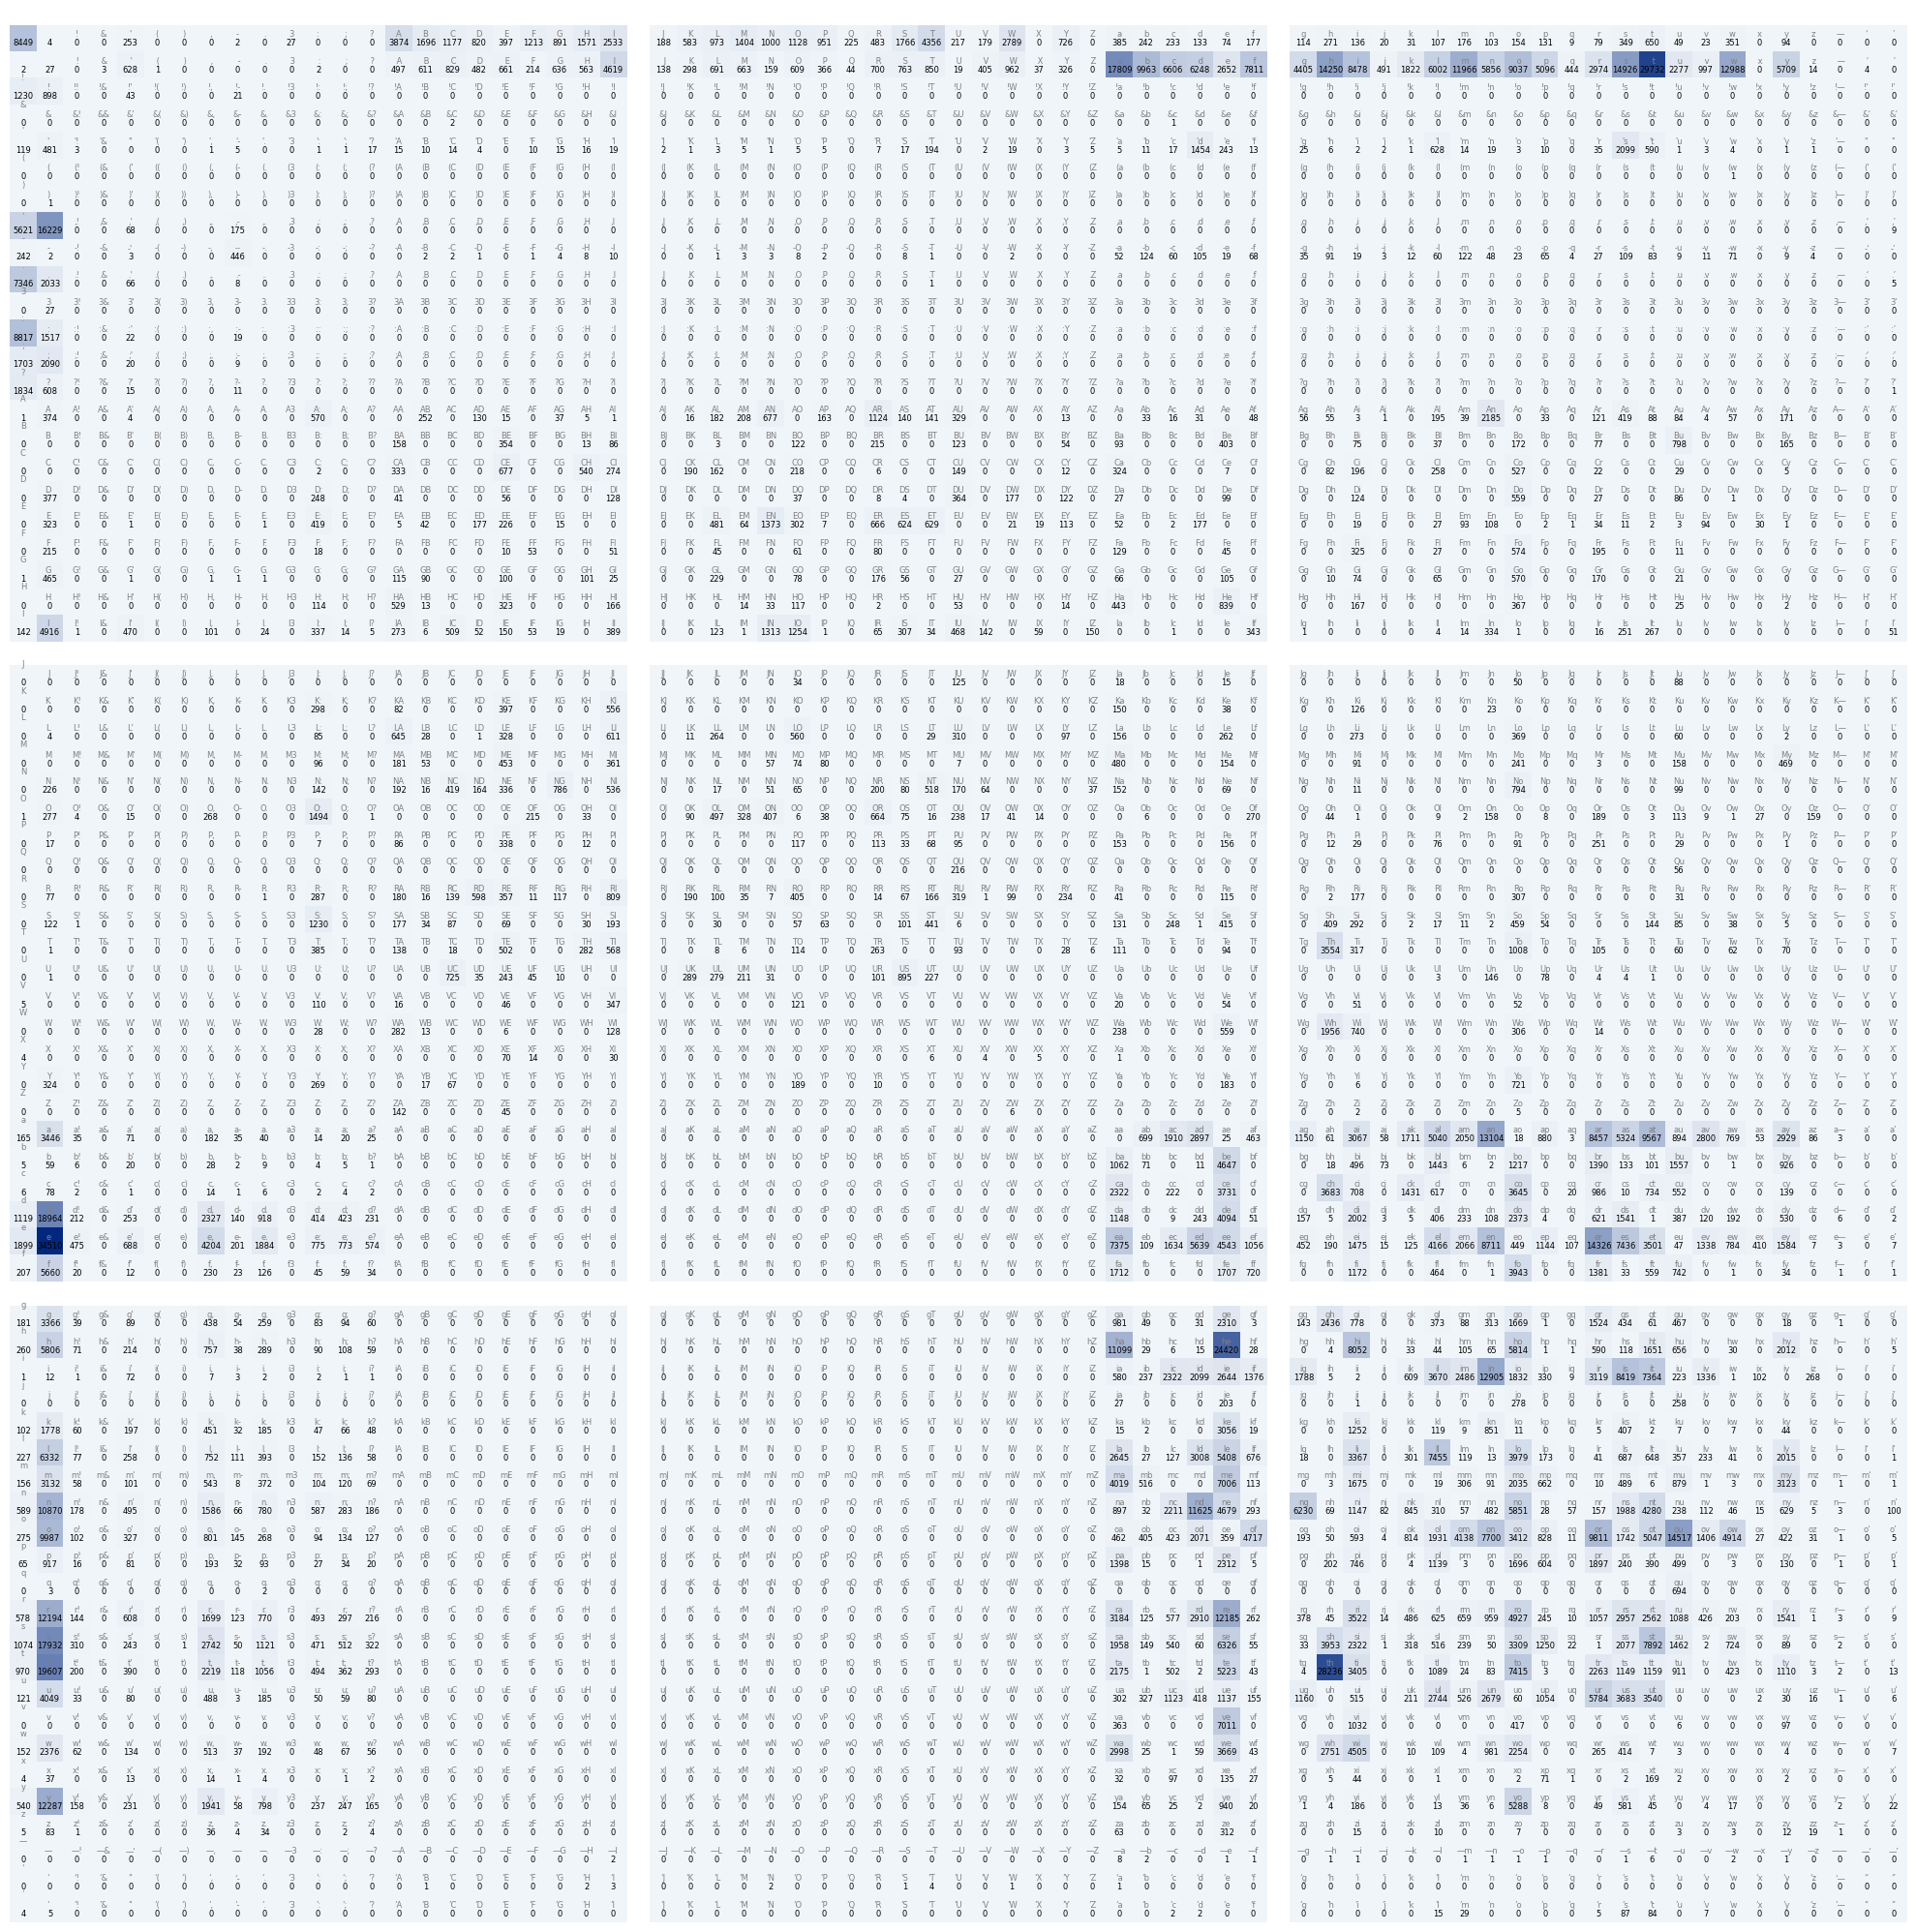

In [40]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import torch

# Example settings
num_subplots_side = 3  # Number of subplots on each side of the grid
subplot_size = 23  # Size of each subplot side

# Create a custom colormap from white to blue
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_blue", ["#f0f5f9", "#01277e"], N=256
)

# Create a figure with subplots
fig, axes = plt.subplots(num_subplots_side, num_subplots_side, figsize=(20, 20))

# Loop through each subplot position
for i in range(num_subplots_side):
    for j in range(num_subplots_side):
        ax = axes[i, j]  # Get the subplot axis
        # Calculate the row and column indices for the section of the matrix to plot
        row_start = i * subplot_size
        col_start = j * subplot_size
        section = N[row_start:row_start + subplot_size, col_start:col_start + subplot_size]
        
        # Display the section with the custom colormap
        im = ax.imshow(section, cmap=cmap, vmin=0, vmax=N.max().item())  # Use PyTorch's .max() for compatibility
        
        # Optionally, add annotations for each cell in the section
        for x in range(subplot_size):
            for y in range(subplot_size):
                ch1 = itos[row_start + y]
                ch2 = itos[col_start + x]
                chstr = ch1 + ch2
                count = section[y, x].item()
                ax.text(x, y, chstr, ha="center", va="bottom", color='gray', fontsize=6)
                ax.text(x, y, str(count), ha="center", va="top", color='black', fontsize=6)

        # Turn off axis labels
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
